In [14]:
import random
import numpy as np
import matplotlib.pyplot as plt
import math

In [20]:
class LinearModel:
    
    def __init__(self):
        pass

    @classmethod
    def create_linear_model(cls, data, labels):
        cls.X = np.array(data)
        if type(labels[0]) == str:
            labels_set = list(set(labels))
            label_dict = {labels_set[0]: 1, labels_set[1]: -1}
            cls.y = np.array([label_dict[label] for label in labels])
        else:
            cls.y = labels
            
        
        
        return cls()
    
    def train_classification(self, learning_rate, epochs):
        self.W = np.array([random.uniform(-1, 1) for i in range(len(self.x[0]))])
        self.b = random.uniform(-1, 1)
        for epoch in range(epochs):
            idx = random.randint(0, len(self.X) - 1)
            random_data = self.X[idx]
            true_label = self.y[idx]
            
            prediction = self.predict(random_data)
            error = true_label - prediction
            
            self.W += learning_rate * error * random_data
            self.b += learning_rate * error
    
    def train_regression(self):
        X_augmented = np.c_[np.ones((self.X.shape[0], 1)), self.X]  # Ajout de la colonne de 1 pour le biais
        self.X = X_augmented
        # Matrice X transposée
        X_transpose = self.X.T
        
        # Calcul de la matrice de covariance (X^T * X)
        X_transpose_X = np.matmul(X_transpose, self.X)
        print(X_transpose_X)
        # Inverse de X^T * X
        X_transpose_X_inv = np.linalg.inv(X_transpose_X)
        
        # Calcul des poids W (inclut le biais)
        X_transpose_X_inv_X_transpose = np.matmul(X_transpose_X_inv, X_transpose)
        
        # Calcul des coefficients (poids et biais)
        self.W = np.matmul(X_transpose_X_inv_X_transpose, self.y)
        
        # Le biais est le premier coefficient dans W
        self.b = self.W[0]

        # Les poids (pente) sont le reste des coefficients
        self.W = self.W[1:][0]
        
    def predict(self, data):
        s = 0
        for i in range(len(data)):
            s += data[i] * self.W[i]
        s += self.b
    
        if s > 0:
            return 1
        else:
            return -1

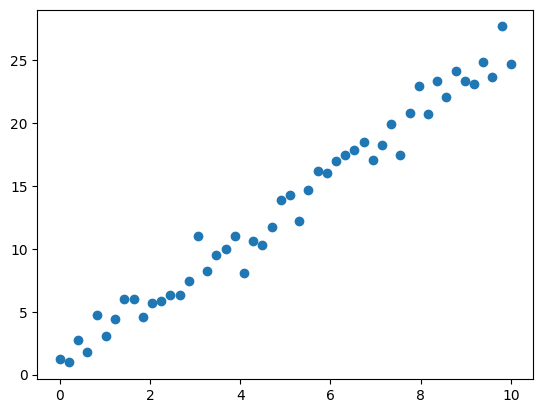

In [21]:
# je veux des points pour faire une régression, donc assez linéaire mais avec un peu de noise
x = np.linspace(0, 10, 50)
y = 2.5 * x + 1 + np.random.normal(0, 1, size=50)

points = np.array(list(zip(x, y)))
plt.scatter(points[:,0], points[:,1])

In [22]:
x = [[1, x] for x in x]
x = np.array(x)

In [23]:
linearModel = LinearModel.create_linear_model(x, y.reshape(-1, 1))
linearModel.train_regression()
print(linearModel.W, linearModel.b)

y_pred = np.matmul(np.c_[np.ones((x.shape[0], 1)), x.reshape(-1, 1)], np.r_[linearModel.b, linearModel.W])
plt.plot(x, y_pred, color='red', label='Droite de régression')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Régression Linéaire avec Bruit')
plt.legend()
plt.show()

[[  50.           50.          250.        ]
 [  50.           50.          250.        ]
 [ 250.          250.         1683.67346939]]


LinAlgError: Singular matrix

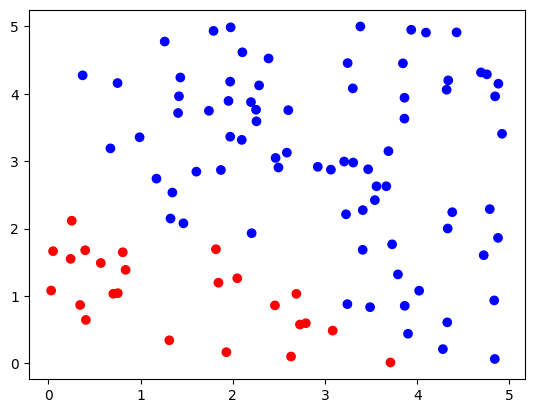

In [ ]:
points = np.random.uniform(0, 5, (100, 2))

a = 0.6666666666
b = 1.0
c = -3.0

colors = []
for p in points:
    colors.append('blue' if a * p[0] + b * p[1] + c >= 0 else 'red')
    
plt.scatter(points[:, 0], points[:, 1], c=colors)

In [ ]:
linearModel = LinearModel.create_linear_model(points, colors)
linearModel.train_classification(0.01, 10000)
print(linearModel.W, linearModel.b)

[[ 4.17999854 54.17999854]
 [42.75682355 92.75682355]
 [44.51607041 94.51607041]
 [37.81775271 87.81775271]
 [41.13273289 91.13273289]
 [35.9670965  85.9670965 ]
 [33.29647149 83.29647149]
 [33.41440039 83.41440039]
 [32.03317155 82.03317155]
 [31.0398198  81.0398198 ]
 [12.93027733 62.93027733]
 [35.40320148 85.40320148]
 [ 9.28833685 59.28833685]
 [12.78863159 62.78863159]
 [23.84363685 73.84363685]
 [28.58275837 78.58275837]
 [ 9.63044193 59.63044193]
 [25.46652416 75.46652416]
 [17.52041757 67.52041757]
 [32.85510261 82.85510261]
 [11.17475875 61.17475875]
 [10.13946883 60.13946883]
 [ 1.06347831 51.06347831]
 [29.93946298 79.93946298]
 [ 0.26996276 50.26996276]
 [ 3.51221884 53.51221884]
 [49.60770334 99.60770334]
 [-0.54832517 49.45167483]
 [18.64796731 68.64796731]
 [46.64439597 96.64439597]
 [22.58586276 72.58586276]
 [38.63265329 88.63265329]
 [30.19437146 80.19437146]
 [39.010237   89.010237  ]
 [43.87811363 93.87811363]
 [43.15628175 93.15628175]
 [40.66647256 90.66647256]
 

C:\Users\leopo\AppData\Local\Temp\ipykernel_27052\1118380830.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(points[:, 0], points[:, 1], c=colors, cmap='bwr')


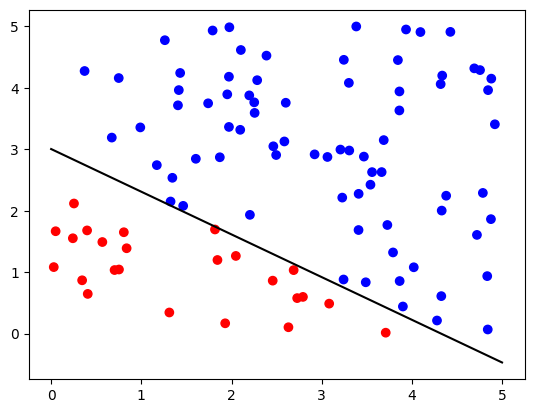

In [ ]:
# Affichage de la droite de séparation
x = np.linspace(0, 5, 5)
y = (-linearModel.b - linearModel.W[0] * x) / linearModel.W[1]
plt.plot(x, y, color='black')
plt.scatter(points[:, 0], points[:, 1], c=colors, cmap='bwr')

In [ ]:
X = np.array([
      [1, 1],
      [2, 3],
      [3, 3]
])
Y = np.array([
      1,
      -1,
      -1
])

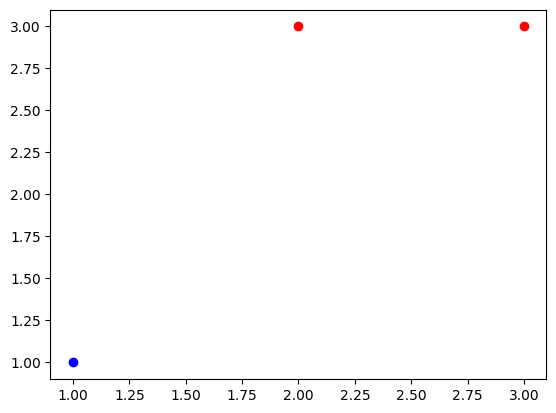

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.scatter(X[0, 0], X[0, 1], color='blue')
plt.scatter(X[1:3,0], X[1:3,1], color='red')
plt.show()
plt.clf()

In [ ]:
linearModel2 = LinearModel.create_linear_model(X, Y)
linearModel2.train_classification(0.01, 10)
print(linearModel2.W, linearModel2.b)

[ 1 -1 -1]
[ 0.39333676 -0.63374761] 0.4710086750608613


[0.   1.25 2.5  3.75 5.  ] [0.74321176 1.51902685 2.29484194 3.07065703 3.84647212]


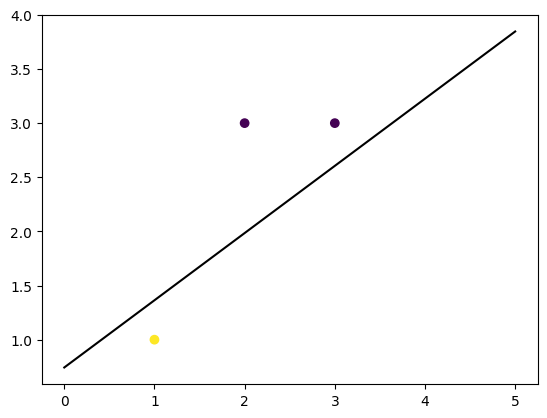

In [ ]:
# Affichage de la droite de séparation
x = np.linspace(0, 5, 5)
y = (-linearModel2.b - linearModel2.W[0] * x) / linearModel2.W[1]
print(x, y)
plt.plot(x, y, color='black')
plt.scatter(X[:,0], X[:,1], c=Y)

In [ ]:
X = np.array([
        [1, 0],
        [0, 1],
        [0, 0],
        [1, 1]
])
Y = np.array([
      "true",
        "true",
        "false",
        "true"
])

linearModel2 = LinearModel.create_linear_model(X, Y)
linearModel2.train_classification(0.001, 100000)


[-1 -1  1 -1]


In [ ]:
linearModel2.predict([0, 1])

-1

-0.13452128235992775 -0.49609442683020677 0.13401853288528054


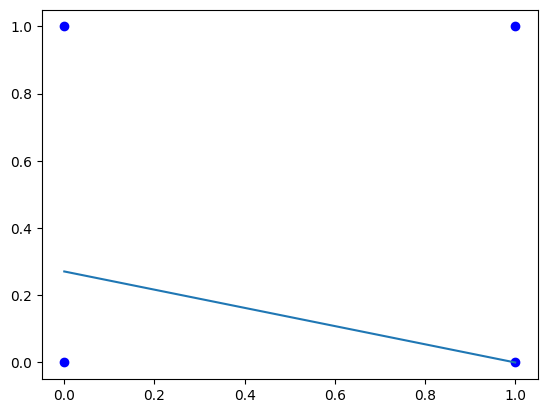

In [ ]:
plt.scatter(X[:, 0], X[:, 1], color='blue')

a = linearModel2.W[0]
b = linearModel2.W[1]
c = linearModel2.b
print(a, b, c)
# Créer une plage de valeurs pour x
x_vals = np.linspace(0, 1, 5)

# Calculer les valeurs correspondantes de y
y_vals = -(a * x_vals + c) / b

# Tracer la droite
plt.plot(x_vals, y_vals, label=f'{a}x + {b}y + {c} = 0')

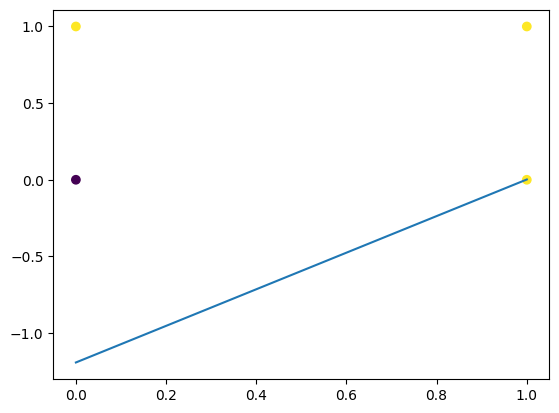

In [ ]:
x = np.array([[1.0, 0.0], [0.0, 1.0], [0.0, 0.0], [1.0, 1.0]])
y = np.array(["true", "true", "false", "true"])
# classif = LinearModel.create_linear_model(x, y)
# classif.train_classification(0.01, 1000)
# print(classif.W, classif.b)


plt.scatter(x[:,0], x[:,1], c=[1 if i == "true" else -1 for i in y])


W = [0.4100550433473009, -0.4117666639468973, -0.47505005518909593]
W = [-0.6948406037923505, 0.6948549918878464, 0.2859036450647987]
W = [0.10513822070801047, -0.10618186919009998, -0.2182071040534641]
W = [0.49033128484310695, -0.49016845747388804, -0.14748564727925872]
W = [-0.26734070126422194, 0.26783976577389196, 0.5582876872325264]
W =  [0.519890384292313, -0.5207105615077314, 0.5484034868460785]

W = [0.6882818728509015, -0.6890292101705027, 0.40571077662275945]

W = [-0.423303782960353, 0.4232807163345307, 0.8599934445337065]

W = [-0.5686616644460332, 0.5675822715161687, 0.9931346485432977]
W = [-0.24639676119299866, 0.24677836321064284, -0.20670748700292219]
a = W[1]
b = W[2]
c = W[0]

# Créer une plage de valeurs pour x
x_vals = np.linspace(0, 1, 400)

# Calculer les valeurs correspondantes de y
y_vals = -(a * x_vals + c) / b

# Tracer la droite
plt.plot(x_vals, y_vals, label=f'{a}x + {b}y + {c} = 0')
